Initialisation
=========================================

In [ ]:
!git clone https://github.com/tom38110/Apprentissage-profond.git
path = "./Apprentissage-profond/"

Cloning into 'Apprentissage-profond'...
remote: Enumerating objects: 1579, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 1579 (delta 11), reused 28 (delta 10), pack-reused 1548
Receiving objects: 100% (1579/1579), 349.44 MiB | 15.55 MiB/s, done.
Resolving deltas: 100% (109/109), done.
Updating files: 100% (1096/1096), done.


In [ ]:
import os
import shutil

import numpy as np
import PIL
from PIL import Image
import os, sys
from scipy.io import loadmat


def load_data(data_path, classes, dataset='Train', image_size=64):

    num_images = 0
    for i in range(len(classes)):
        dirs = sorted(os.listdir(data_path + dataset + '/' + classes[i]))
        num_images += len(dirs)

    x = np.zeros((num_images, image_size, image_size, 3))
    y = np.zeros((num_images, 1))

    current_index = 0

    # Parcours des différents répertoires pour collecter les images
    for idx_class in range(len(classes)):
        dirs = sorted(os.listdir(data_path + dataset + '/' + classes[idx_class]))
        num_images += len(dirs)

        # Chargement des images,
        for idx_img in range(len(dirs)):
            item = dirs[idx_img]
            if os.path.isfile(data_path + dataset + '/' + classes[idx_class] + '/' + item):
                # Ouverture de l'image
                img = Image.open(data_path + dataset + '/' + classes[idx_class] + '/' + item)
                # Conversion de l'image en RGB
                img = img.convert('RGB')
                # Redimensionnement de l'image et écriture dans la variable de retour x
                img = img.resize((image_size,image_size))
                x[current_index] = np.asarray(img)
                # Écriture du label associé dans la variable de retour y
                y[current_index] = idx_class
                current_index += 1

    return x, y

In [ ]:
labels = ['Capitole', 'Basilique_Saint_Sernin', 'Cathedrale_Saint_Etienne','Chapelle_Saint_Joseph','Couvent_Des_Jacobins','Gare_Matabiau','Hotel_Assezat','Hotel_Dieu','Monument_Aux_Morts','Musee_Des_Augustins']

IMAGE_SIZE = 126

x_train, y_train = load_data(path, labels, dataset='Train', image_size=IMAGE_SIZE)
print(x_train.shape, y_train.shape)

x_val, y_val = load_data(path, labels, dataset='Validation', image_size=IMAGE_SIZE)
print(x_val.shape, y_val.shape)

x_test, y_test = load_data(path, labels, dataset='Test', image_size=IMAGE_SIZE)
print(x_test.shape, y_test.shape)

(885, 126, 126, 3) (885, 1)
(102, 126, 126, 3) (102, 1)
(101, 126, 126, 3) (101, 1)


In [ ]:
def plot_training_analysis():
  acc = history.history['sparse_categorical_accuracy']
  val_acc = history.history['val_sparse_categorical_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'b', linestyle="--",label='Training acc')
  plt.plot(epochs, val_acc, 'g', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.figure()

  plt.plot(epochs, loss, 'b', linestyle="--",label='Training loss')
  plt.plot(epochs, val_loss,'g', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

<ipython-input-6-61a06bce2d8f>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(labels[int(y_train[shuffle_indices[i]])])


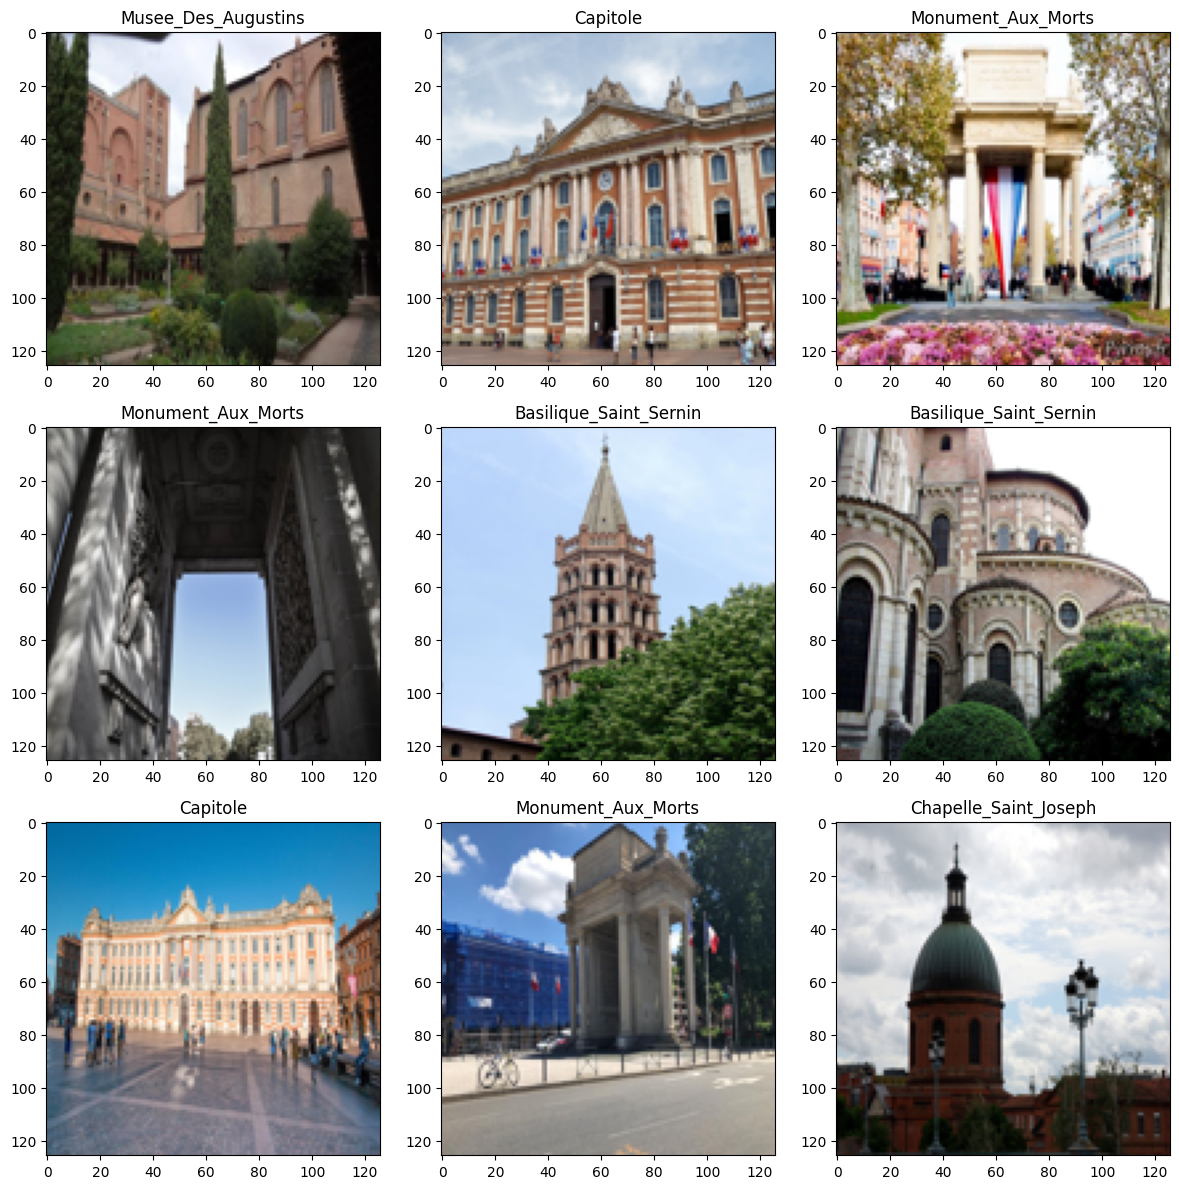

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
nb_images_total = 885
shuffle_indices = np.random.permutation(nb_images_total)
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    image = x_train[shuffle_indices[i]]
    plt.title(labels[int(y_train[shuffle_indices[i]])])
    plt.imshow(image/255)

plt.tight_layout()
plt.show()

Réseau de base (~60%)
================================================================================

In [ ]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import optimizers

model = Sequential()

model.add(Conv2D(64, (3,3) , activation='relu', input_shape=(IMAGE_SIZE,IMAGE_SIZE,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3,3) ,activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(192, (3,3) ,activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3,3) ,activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 124, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 62, 62, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 192)       221376    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 192)       0

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=3e-4),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20, batch_size=10)

Epoch 1/20


KeyboardInterrupt: 

In [ ]:
def plot_training_analysis():
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'b', linestyle="--",label='Training acc')
  plt.plot(epochs, val_acc, 'g', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.figure()

  plt.plot(epochs, loss, 'b', linestyle="--",label='Training loss')
  plt.plot(epochs, val_loss,'g', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

In [ ]:
plot_training_analysis()

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import multilabel_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

y_pred = np.argmax(model.predict(x_test),axis=1)

print('---------------------------------------------------')
score = accuracy_score(y_test, y_pred)
print('Accuracy score : ', score)

print('---------------------------------------------------')
print('Confusion matrix : \n')
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(xticks_rotation = 'vertical')
plt.show()

print('---------------------------------------------------')
report = classification_report(y_test, y_pred,  target_names=labels)
print('Classification report : \n', report)


Augmentation de données + ResNet50 (~85-90%)
================================================================================

In [ ]:
import cv2 as cv
from albumentations import (Compose, RandomBrightnessContrast, RandomCrop, CenterCrop, HorizontalFlip, ShiftScaleRotate, Blur, Resize)

CROPPED_IMAGE_SIZE = int(IMAGE_SIZE/2)

AUGMENTATIONS_TRAIN = Compose([
    RandomCrop(CROPPED_IMAGE_SIZE, CROPPED_IMAGE_SIZE, p=1),
    HorizontalFlip(p=0.5),
    ShiftScaleRotate(shift_limit=0.25, scale_limit=0.25, rotate_limit=0.25, p=0.5),
    Blur(blur_limit=(5, 5), p=0.2)
])

AUGMENTATIONS_VAL = Compose([
    CenterCrop(CROPPED_IMAGE_SIZE, CROPPED_IMAGE_SIZE, p=1),
])

In [ ]:
from tensorflow.keras.utils import Sequence
from keras.applications.resnet50 import preprocess_input

class MonumentSequence(Sequence):
    # Initialisation de la séquence avec différents paramètres
    def __init__(self, x_set, y_set, batch_size,augmentations):
        self.x, self.y = x_set, y_set
        self.batch_size = batch_size
        self.augment = augmentations
        self.indices1 = np.arange(x_set.shape[0])
        np.random.shuffle(self.indices1) # Les indices permettent d'accéder
        # aux données et sont randomisés à chaque epoch pour varier la composition
        # des batches au cours de l'entraînement

    # Fonction calculant le nombre de pas de descente du gradient par epoch
    def __len__(self):
        return int(np.ceil(len(self.x) / float(self.batch_size)))

    # Application de l'augmentation de données à chaque image du batch et aux
    # cartes de probabilités associées
    def apply_augmentation(self, bx):

        batch_x = np.zeros((bx.shape[0], CROPPED_IMAGE_SIZE, CROPPED_IMAGE_SIZE, 3))
        # Pour chaque image du batch
        for i in range(len(bx)):

            img = bx[i]
            # Application de l'augmentation à l'image et aux masques
            transformed = self.augment(image=img)

            batch_x[i] = transformed['image']


        return batch_x

    # Fonction appelée à chaque nouveau batch : sélection et augmentation des données
    def __getitem__(self, idx):
        batch_x = self.x[self.indices1[idx * self.batch_size:(idx + 1) * self.batch_size]]
        batch_y = self.y[self.indices1[idx * self.batch_size:(idx + 1) * self.batch_size]]

        # Ajout preprocessing pour ResNet50
        batch_x = preprocess_input(batch_x)

        batch_x = self.apply_augmentation(batch_x)

        return np.array(batch_x), np.array(batch_y)

    # Fonction appelée à la fin d'un epoch ; on randomise les indices d'accès aux données
    def on_epoch_end(self):
        np.random.shuffle(self.indices1)



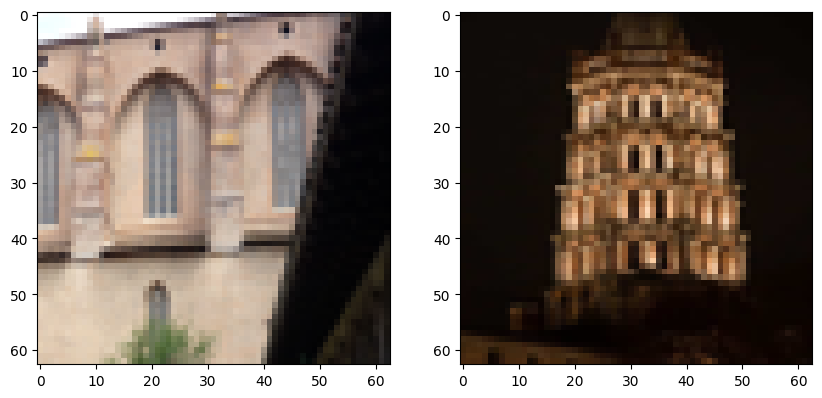

In [ ]:
import matplotlib.pyplot as plt


# Instanciation d'une Sequence
train_gen = MonumentSequence(x_train, y_train, 16, augmentations=AUGMENTATIONS_TRAIN)
val_gen = MonumentSequence(x_val, y_val, 16, augmentations=AUGMENTATIONS_VAL)

# Pour tester la séquence, nous sélectionnons les éléments du premier batch et les affichons
batch_x, batch_y = train_gen.__getitem__(1)
bx, by = val_gen.__getitem__(1)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(batch_x[0])
plt.subplot(1, 2, 2)
plt.imshow(bx[0])
plt.show()

In [ ]:
from tensorflow.keras.applications import ResNet50

conv_base = ResNet50(weights='imagenet',
                  include_top=False,
                  input_shape=(CROPPED_IMAGE_SIZE, CROPPED_IMAGE_SIZE, 3))

conv_base.summary()

In [ ]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import optimizers

model = Sequential()

conv_base.trainable = False
model.add(conv_base)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=3e-4),
              metrics=['sparse_categorical_accuracy'])

history = model.fit(train_gen,
                    validation_data=val_gen,
                    epochs=50,
                    )


In [ ]:
plot_training_analysis()

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import multilabel_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import cv2

resized_x_test = np.array([cv2.resize(img, (CROPPED_IMAGE_SIZE, CROPPED_IMAGE_SIZE)) for img in x_test])

resized_x_test = preprocess_input(resized_x_test)

plt.imshow(resized_x_test[50])
plt.show()

'''
y_pred = np.argmax(model.predict(resized_x_test),axis=1)

#print('---------------------------------------------------')
score = accuracy_score(y_test, y_pred)
print('Accuracy score : ', score)

#print('---------------------------------------------------')
print('Confusion matrix : \n')
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(xticks_rotation = 'vertical')
plt.show()

#print('---------------------------------------------------')
report = classification_report(y_test, y_pred,  target_names=labels)
print('Classification report : \n', report)
'''

Transfer learning - ResNet50 (~80%)
================================================================================

In [ ]:
from tensorflow.keras.applications import ResNet50

conv_base = ResNet50(weights='imagenet',
                  include_top=False,
                  input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

conv_base.summary()

In [ ]:
train_features = conv_base.predict(x_train)
train_features = np.reshape(train_features,(train_features.shape[0],2*2*2048))

val_features = conv_base.predict(x_val)
val_features = np.reshape(val_features,(val_features.shape[0],2*2*2048))

test_features = conv_base.predict(x_test)
test_features = np.reshape(test_features,(test_features.shape[0],2*2*2048))

In [ ]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import optimizers
from tensorflow.keras.applications import ResNet50

model = Sequential()
model.add(Dense(2*2*2048, activation='relu', input_dim = 2*2*2048))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=3e-4),
              metrics=['sparse_categorical_accuracy'])

history = model.fit(train_features,
                    y_train,
                    validation_data=(val_features,y_val),
                    epochs=15,
                    )

In [ ]:
plot_training_analysis()

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import multilabel_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

y_pred = np.argmax(model.predict(test_features),axis=1)

print('---------------------------------------------------')
score = accuracy_score(y_test, y_pred)
print('Accuracy score : ', score)

print('---------------------------------------------------')
print('Confusion matrix : \n')
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(xticks_rotation = 'vertical')
plt.show()

print('---------------------------------------------------')
report = classification_report(y_test, y_pred,  target_names=labels)
print('Classification report : \n', report)
